In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
ds=pd.read_csv('advertising (1).csv')
ds

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
ds.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Analysis

In [4]:
print(ds.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


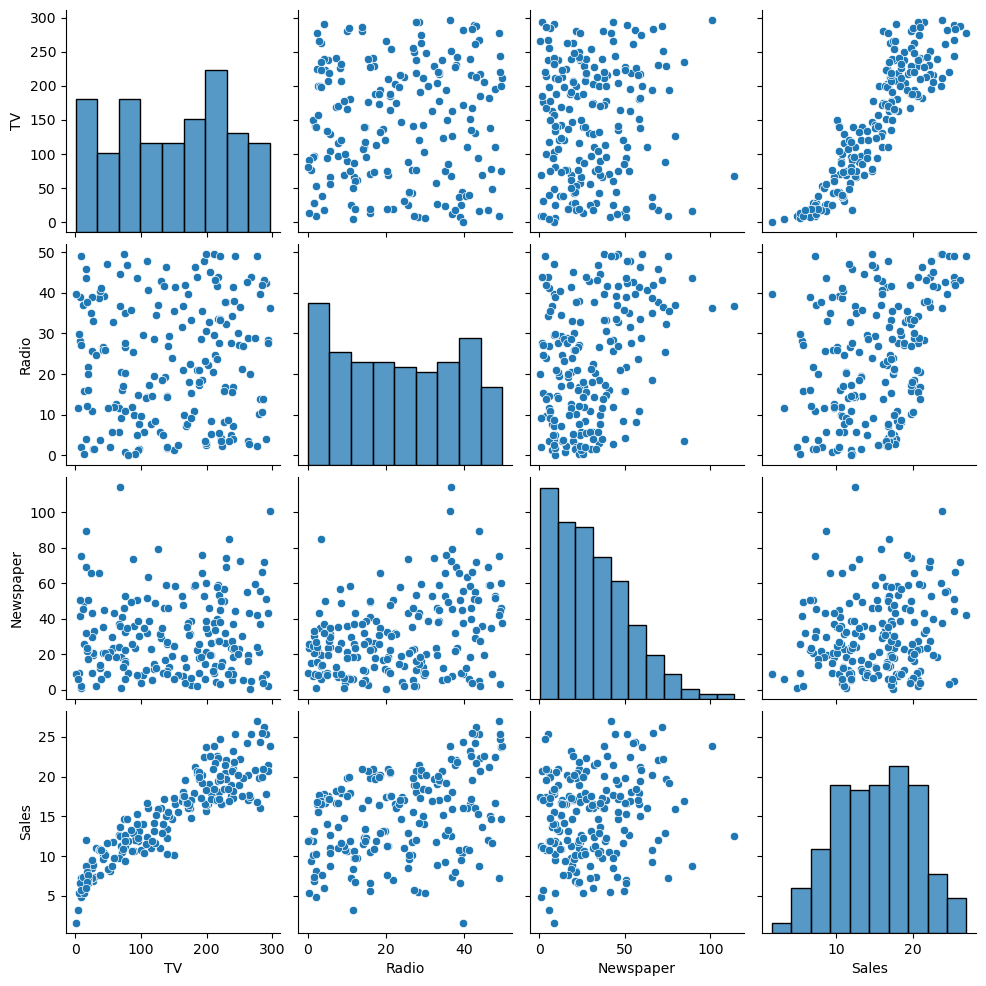

In [5]:
sns.pairplot(ds)
plt.show()

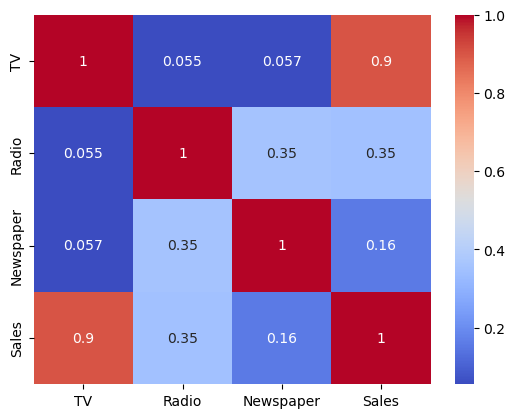

In [6]:
correlation_matrix=ds.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

# Calculating average sales

In [7]:
average_sales=ds['Sales'].mean()
print('Average Sales:',average_sales)

Average Sales: 15.130500000000001


# Histogram of Sales

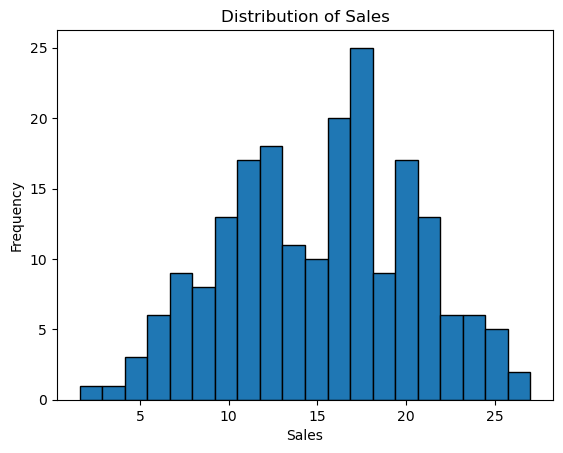

In [8]:
plt.hist(ds['Sales'],bins=20,edgecolor='k')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

# Scatter Plots for individual Advertising Channels


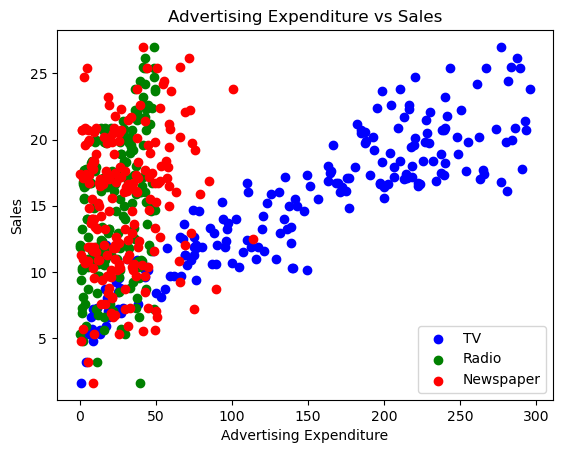

In [9]:
plt.scatter(ds['TV'],ds['Sales'],c='blue',label='TV')
plt.scatter(ds['Radio'],ds['Sales'],c='green',label='Radio')
plt.scatter(ds['Newspaper'],ds['Sales'],c='red',label='Newspaper')
plt.xlabel('Advertising Expenditure')
plt.ylabel('Sales')
plt.legend()
plt.title('Advertising Expenditure vs Sales')
plt.show()

# Box Plot

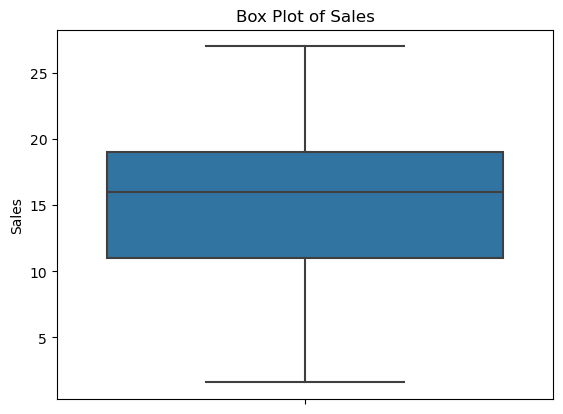

In [10]:
sns.boxplot(y=ds['Sales'])
plt.ylabel('Sales')
plt.title('Box Plot of Sales')
plt.show()

In [11]:
#descriptive statistics
summary_stats=ds['Sales'].describe()

Q1=ds['Sales'].quantile(0.25)
Q3=ds['Sales'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=ds[(ds['Sales']<lower_bound)|(ds['Sales']>upper_bound)]
print("Summary statistics for sales:")
print(summary_stats)
print("\nPotential Outliers:")
print(outliers)

Summary statistics for sales:
count    200.000000
mean      15.130500
std        5.283892
min        1.600000
25%       11.000000
50%       16.000000
75%       19.050000
max       27.000000
Name: Sales, dtype: float64

Potential Outliers:
Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []


# Feature selection and Model training

In [12]:
X=ds[['TV','Radio','Newspaper']]
y=ds['Sales']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# Model evaluation

In [15]:
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R-Squared:",r2)

Mean Squared Error: 2.907756910271091
R-Squared: 0.9059011844150826


# Predictions

In [16]:
new_data=pd.DataFrame({'TV':[200],'Radio':[40],'Newspaper':[20]})
predicted_sales=model.predict(new_data)
print("Predicted Sales:",predicted_sales[0])

Predicted Sales: 19.740528001816998


Hence TV advertising expenditure has a strong +ve correlation with sales.Radio advertising also has +ve correlation but it is weaker compared to TV and newspaper has the relatively weak +ve correlation with sales